# Setup

## Installs

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from enum import Enum
import numpy as np

## Load data

In [5]:
df_init = pd.read_csv('../data/coded/complete.tsv', sep='\t')

In [6]:
df = df_init.copy()
df

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Taylor Swift Will Seemingly Attend Beyonce's M...,Taylor Swift missed out on an exciting opportu...,NaN,NaN,NaN,NaN,NaN,NaN,Renaissance,Promo
1,How Donnie Darko And Martin Scorsese Influence...,"Believe it or not, the star and director of Fi...",NaN,NaN,NaN,NaN,NaN,NaN,FNAF,Prod
2,The Marvels Is On Track For One Of The MCU's L...,Bad news for The Marvels: the latest from the ...,NaN,NaN,NaN,NaN,NaN,NaN,Marvels,Box
3,"Leonardo DiCaprio Reacts to Rapping Video, Rev...",Leonardo DiCaprio is speaking out about the vi...,NaN,NaN,NaN,NaN,NaN,NaN,KOTFM,Promo
4,The Marvels Star Iman Vellani Talks Working Wi...,We spoke with The Marvels star Iman Vellani ab...,NaN,NaN,NaN,NaN,NaN,NaN,Marvels,Promo
...,...,...,...,...,...,...,...,...,...,...
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,NaN,Nolin,FNAF,Promo,NR,NaN
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
490,The Book You Should Read If You Love – Or Hate...,Ridley Scott&amp;#39;s Napoleon isn&amp;#39;t ...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


## Utils

In [7]:
class Headers(Enum):
    coder1 = "coder 1"
    movie1 = "movie 1"
    topic1 = "topic 1"
    coder2 = "coder 2"
    movie2 = "movie 2"
    topic2 = "topic 2"
    final_movie = "final movie"
    final_topic = "final topic"
    title = "title"
    description = "description"


class Movies(Enum):
    Renaissance = "Renaissance"
    Godzilla = "Godzilla"
    Napoleon = "Napoleon"
    Wish = "Wish"
    HG = "HG"
    Trolls = "Trolls"
    Thanksgiving = "Thanksgiving"
    Marvels = "Marvels"
    FNAF = "FNAF"
    After_Death = "After Death"
    KOTFM = "KOTFM"
    Not_mentioned = "NM"
    Not_relevant = "NR"
    Not_coded = 'N/C'


def full_movie(movie: Movies):
    match movie.value:
        case Movies.Renaissance.value:
            return "Renaissance: a film by beyonce"
        case Movies.Godzilla.value:
            return "Godzilla Minus One"
        case Movies.Napoleon.value:
            return "Napoleon"
        case Movies.Wish.value:
            return "Wish"
        case Movies.HG.value:
            return "The Hunger Games: The Ballad of Songbirds & Snakes"
        case Movies.Trolls.value:
            return "Trolls Band Together"
        case Movies.Thanksgiving.value:
            return "Thanksgiving"
        case Movies.Marvels.value:
            return "The Marvels"
        case Movies.FNAF.value:
            return "Five Nights at Freddy's"
        case Movies.After_Death.value:
            return "After Death"
        case Movies.KOTFM.value:
            return "Killers of the Flower Moon"


class Topics(Enum):
    Box = "Box"
    NR = "NR"
    Streaming = "Streaming"
    Prod = "Prod"
    Plot = "Plot"
    Awards = "Awards"
    Promo = "Promo"
    Not_coded = 'N/C'


def full_topic(topic: Topics):
    match topic.value:
        case Topics.Box.value:
            return 'Box Office'
        case Topics.NR.value:
            return 'Movie only mentioned'
        case Topics.Streaming.value:
            return Topics.Streaming.value
        case Topics.Prod.value:
            return 'Production'
        case Topics.Plot.value:
            return 'Plot and performances'
        case Topics.Awards.value:
            return Topics.Awards.value
        case Topics.Promo.value:
            return 'Promotion'


class Coders(Enum):
    Tristan = "Tristan"
    Juan = "Juan"
    Michael = "Michael"
    Jean_Alexandre = "Jean-Alexandre"
    No_coder = 'N/C'


## Clean

In [8]:
def movie_should_not_have_topic(movie):
    return movie != Movies.Not_coded.value and \
        movie != Movies.Not_relevant.value and \
        movie != Movies.Not_mentioned.value

In [9]:
def clean_topics(df_to_clean):
    def clean_topic(topic_header, movie_header):
        missing_mask = df_to_clean[topic_header].isna()
        mapping = dict({Movies.Not_coded.value: Topics.Not_coded.value,
                        Movies.Not_relevant.value: Topics.Not_coded.value,
                        Movies.Not_mentioned.value: Topics.Not_coded.value, })
        df_to_clean.loc[missing_mask, topic_header] = df_to_clean.loc[
            missing_mask, movie_header].map(mapping)

    df_to_clean = df_to_clean.copy()
    clean_topic(Headers.topic1.value, Headers.movie1.value)
    clean_topic(Headers.topic2.value, Headers.movie2.value)
    clean_topic(Headers.final_topic.value, Headers.final_movie.value)
    return df_to_clean



In [10]:
df_clean = df.copy()
df_clean = df_clean.dropna(axis=0, how='all')
df_clean.tail()

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,NaN,Nolin,FNAF,Promo,NR,NaN
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
490,The Book You Should Read If You Love – Or Hate...,Ridley Scott&amp;#39;s Napoleon isn&amp;#39;t ...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


In [11]:
df_clean[Headers.coder1.value] = df_clean[Headers.coder1.value].fillna(
    Coders.No_coder.value)
df_clean[Headers.coder2.value] = df_clean[Headers.coder2.value].fillna(
    Coders.No_coder.value)
df_clean[Headers.movie1.value] = df_clean[Headers.movie1.value].fillna(
    Movies.Not_coded.value)
df_clean[Headers.movie2.value] = df_clean[Headers.movie2.value].fillna(
    Movies.Not_coded.value)
df_clean = clean_topics(df_clean)
df_clean

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Taylor Swift Will Seemingly Attend Beyonce's M...,Taylor Swift missed out on an exciting opportu...,N/C,N/C,N/C,N/C,N/C,N/C,Renaissance,Promo
1,How Donnie Darko And Martin Scorsese Influence...,"Believe it or not, the star and director of Fi...",N/C,N/C,N/C,N/C,N/C,N/C,FNAF,Prod
2,The Marvels Is On Track For One Of The MCU's L...,Bad news for The Marvels: the latest from the ...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Box
3,"Leonardo DiCaprio Reacts to Rapping Video, Rev...",Leonardo DiCaprio is speaking out about the vi...,N/C,N/C,N/C,N/C,N/C,N/C,KOTFM,Promo
4,The Marvels Star Iman Vellani Talks Working Wi...,We spoke with The Marvels star Iman Vellani ab...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Promo
...,...,...,...,...,...,...,...,...,...,...
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,N/C,Nolin,FNAF,Promo,NR,N/C
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,N/C,Nolin,NM,N/C,NM,N/C
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,N/C,Nolin,NM,N/C,NM,N/C


In [12]:
movie_and_topic = df_clean[[Headers.final_movie.value, Headers.final_topic.value]]
movie_and_topic.loc[movie_and_topic[Headers.final_topic.value] == Topics.Box.value].value_counts()

final movie                           final topic
Marvels                               Box            32
HG                                    Box            16
Godzilla                              Box            13
Renaissance                           Box            10
Napoleon                              Box             7
FNAF                                  Box             6
HG, Napoleon, Wish                    Box             5
HG, Trolls                            Box             4
HG, Marvels                           Box             3
Napoleon, Wish                        Box             3
Napoleon, Wish, HG                    Box             3
KOTFM                                 Box             2
Marvels, HG                           Box             1
Renaissance, Godzilla, Marvels, Wish  Box             1
Wish, Napoleon, HG                    Box             1
Wish, Napoleon                        Box             1
Wish, Marvels                         Box             

# Analysis

## Movie counts

In [13]:
col = Headers.final_movie.value
df_counts = df_clean.copy()
df_counts[col] = df_counts[col].str.split(", ")
df_counts = df_counts.explode(col)
counts = df_counts.value_counts(col)
counts

final movie
KOTFM          96
HG             87
Marvels        76
NM             63
Godzilla       57
Napoleon       51
NR             30
Renaissance    24
Trolls         22
FNAF           19
Wish           19
Name: count, dtype: int64

<Axes: ylabel='count'>

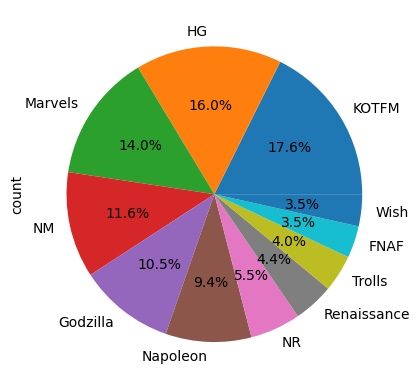

In [14]:
counts.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')

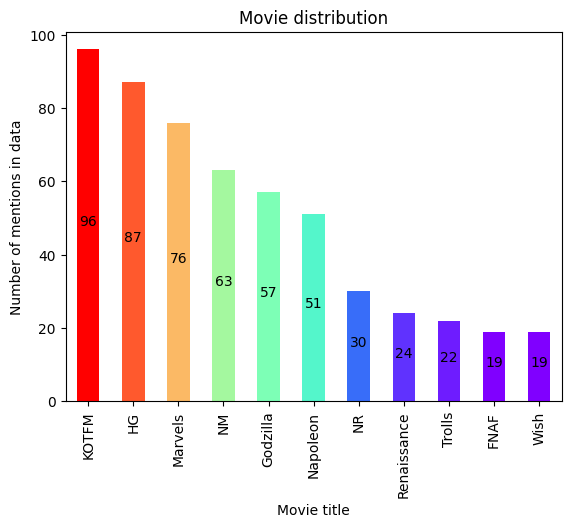

In [15]:
cmap = plt.colormaps['rainbow']
norm = plt.Normalize(counts.min(), counts.max())
colors = [cmap(norm(value)) for value in counts.values]

ax = counts.plot(kind='bar', color=colors)
ax.set_ylabel('Number of mentions in data')
ax.set_xlabel('Movie title')
ax.set_title('Movie distribution')

for i, v in enumerate(counts.values):
    ax.text(i, v / 2, str(v), color='black', ha='center')

plt.savefig('./final_figs/Movie distribution.png', bbox_inches='tight')
plt.show()

## Topic analysis

In [16]:
df_topics = df_clean.copy()

col = Headers.final_topic.value
movie_col = Headers.final_movie.value

df_topics = df_topics[df_topics[col] != Topics.Not_coded.value]
df_topics = df_topics[
    df_topics[Headers.final_movie.value] != Movies.Not_mentioned.value]
df_topics[col] = df_topics[col].map(lambda topic: full_topic(Topics[topic]))
df_topics[movie_col] = df_topics[movie_col].str.split(', ')
df_topics = df_topics.explode(movie_col)
topic_counts = df_topics[col].value_counts()
topic_counts

final topic
Box Office               164
Plot and performances    120
Promotion                 59
Movie only mentioned      31
Streaming                 29
Awards                    26
Production                22
Name: count, dtype: int64

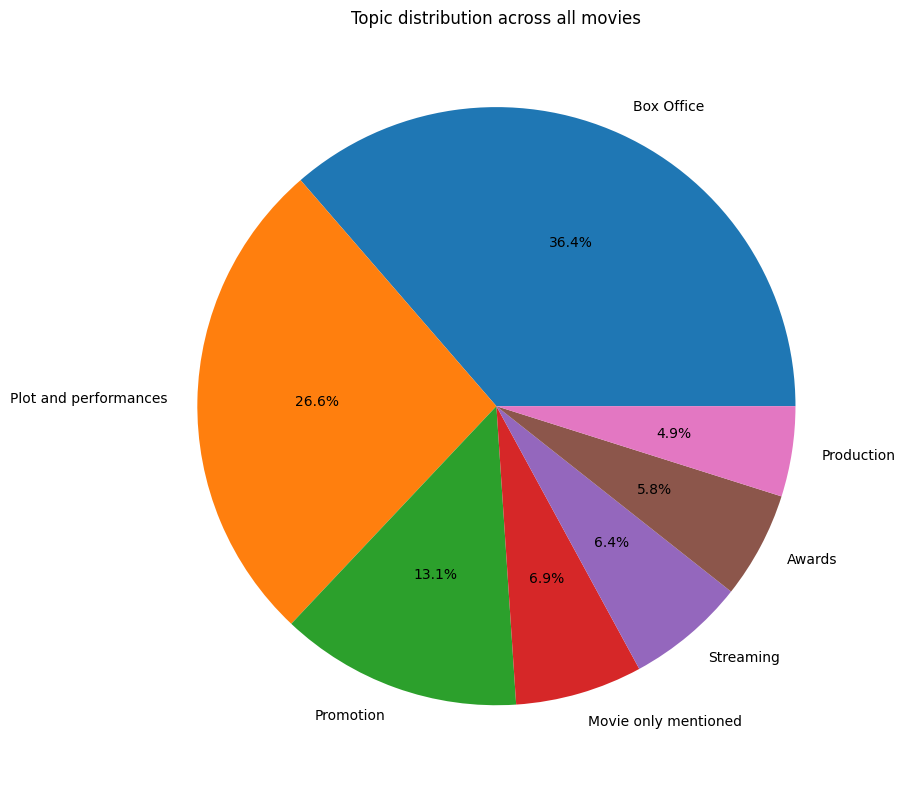

In [17]:
topic_counts.plot(kind='pie', subplots=True, figsize=(12, 8),
                  autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
plt.title('Topic distribution across all movies')
plt.ylabel('')
plt.savefig('./final_figs/Total topic distribution.png')
plt.tight_layout()
plt.show()

In [18]:
df_topics

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Taylor Swift Will Seemingly Attend Beyonce's M...,Taylor Swift missed out on an exciting opportu...,N/C,N/C,N/C,N/C,N/C,N/C,Renaissance,Promotion
1,How Donnie Darko And Martin Scorsese Influence...,"Believe it or not, the star and director of Fi...",N/C,N/C,N/C,N/C,N/C,N/C,FNAF,Production
2,The Marvels Is On Track For One Of The MCU's L...,Bad news for The Marvels: the latest from the ...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Box Office
3,"Leonardo DiCaprio Reacts to Rapping Video, Rev...",Leonardo DiCaprio is speaking out about the vi...,N/C,N/C,N/C,N/C,N/C,N/C,KOTFM,Promotion
4,The Marvels Star Iman Vellani Talks Working Wi...,We spoke with The Marvels star Iman Vellani ab...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Promotion
...,...,...,...,...,...,...,...,...,...,...
481,'A great reckoning of our history': Leonardo D...,"Hollywood royalty Martin Scorsese, Leonardo Di...",Juan,KOTFM,Promo,Nolin,KOTFM,Promo,KOTFM,Promotion
482,Napoleon's Last Stand And The Battle Of Waterl...,The Battle of Waterloo is one of the most impo...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot and performances
483,2023's Box Office Makes Josh Hutcherson The Bi...,Josh Hutcherson won big at the Box Office in 2...,Juan,HG,Box,Nolin,HG,Box,HG,Box Office
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot and performances


In [19]:
col = Headers.final_movie.value

df_topics_by_movie = df_topics.copy()
df_topics_by_movie[col] = df_topics_by_movie[col].str.split(', ')
df_topics_by_movie = df_topics_by_movie.explode(col)
df_topics_by_movie

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Taylor Swift Will Seemingly Attend Beyonce's M...,Taylor Swift missed out on an exciting opportu...,N/C,N/C,N/C,N/C,N/C,N/C,Renaissance,Promotion
1,How Donnie Darko And Martin Scorsese Influence...,"Believe it or not, the star and director of Fi...",N/C,N/C,N/C,N/C,N/C,N/C,FNAF,Production
2,The Marvels Is On Track For One Of The MCU's L...,Bad news for The Marvels: the latest from the ...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Box Office
3,"Leonardo DiCaprio Reacts to Rapping Video, Rev...",Leonardo DiCaprio is speaking out about the vi...,N/C,N/C,N/C,N/C,N/C,N/C,KOTFM,Promotion
4,The Marvels Star Iman Vellani Talks Working Wi...,We spoke with The Marvels star Iman Vellani ab...,N/C,N/C,N/C,N/C,N/C,N/C,Marvels,Promotion
...,...,...,...,...,...,...,...,...,...,...
481,'A great reckoning of our history': Leonardo D...,"Hollywood royalty Martin Scorsese, Leonardo Di...",Juan,KOTFM,Promo,Nolin,KOTFM,Promo,KOTFM,Promotion
482,Napoleon's Last Stand And The Battle Of Waterl...,The Battle of Waterloo is one of the most impo...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot and performances
483,2023's Box Office Makes Josh Hutcherson The Bi...,Josh Hutcherson won big at the Box Office in 2...,Juan,HG,Box,Nolin,HG,Box,HG,Box Office
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot and performances


In [20]:
col = Headers.final_movie.value

df_topics_by_movie = df_topics.copy()
df_topics_by_movie[col] = df_topics_by_movie[col].str.split(', ')
df_topics_by_movie = df_topics_by_movie.explode(col)
df_topics_by_movie = df_topics_by_movie.groupby(col)
topics_by_movie_counts = df_topics_by_movie[
    Headers.final_topic.value].value_counts()
topics_by_movie_counts

final movie  final topic          
FNAF         Box Office                6
             Plot and performances     4
             Movie only mentioned      3
             Streaming                 3
             Production                2
             Promotion                 1
Godzilla     Plot and performances    23
             Box Office               16
             Promotion                10
             Streaming                 3
             Production                3
             Movie only mentioned      2
HG           Box Office               37
             Promotion                27
             Plot and performances    16
             Production                4
             Streaming                 1
             Awards                    1
             Movie only mentioned      1
KOTFM        Plot and performances    24
             Awards                   22
             Movie only mentioned     17
             Streaming                15
             Promotion

In [21]:
unstacked = topics_by_movie_counts.unstack(level=0)
unstacked

final movie,FNAF,Godzilla,HG,KOTFM,Marvels,Napoleon,Renaissance,Trolls,Wish
final topic,,,,,,,,,
Awards,NaN,NaN,1.0,22.0,NaN,2.0,NaN,NaN,1.0
Box Office,6.0,16.0,37.0,4.0,40.0,23.0,13.0,8.0,17.0
Movie only mentioned,3.0,2.0,1.0,17.0,3.0,4.0,1.0,NaN,NaN
Plot and performances,4.0,23.0,16.0,24.0,26.0,16.0,1.0,9.0,1.0
Production,2.0,3.0,4.0,6.0,2.0,2.0,NaN,3.0,NaN
Promotion,1.0,10.0,27.0,8.0,4.0,1.0,8.0,NaN,NaN
Streaming,3.0,3.0,1.0,15.0,1.0,3.0,1.0,2.0,NaN


In [22]:
titles = [tup for tup in unstacked]
titles = [full_movie(Movies[title]) for title in titles]
titles

["Five Nights at Freddy's",
 'Godzilla Minus One',
 'The Hunger Games: The Ballad of Songbirds & Snakes',
 'Killers of the Flower Moon',
 'The Marvels',
 'Napoleon',
 'Renaissance: a film by beyonce',
 'Trolls Band Together',
 'Wish']

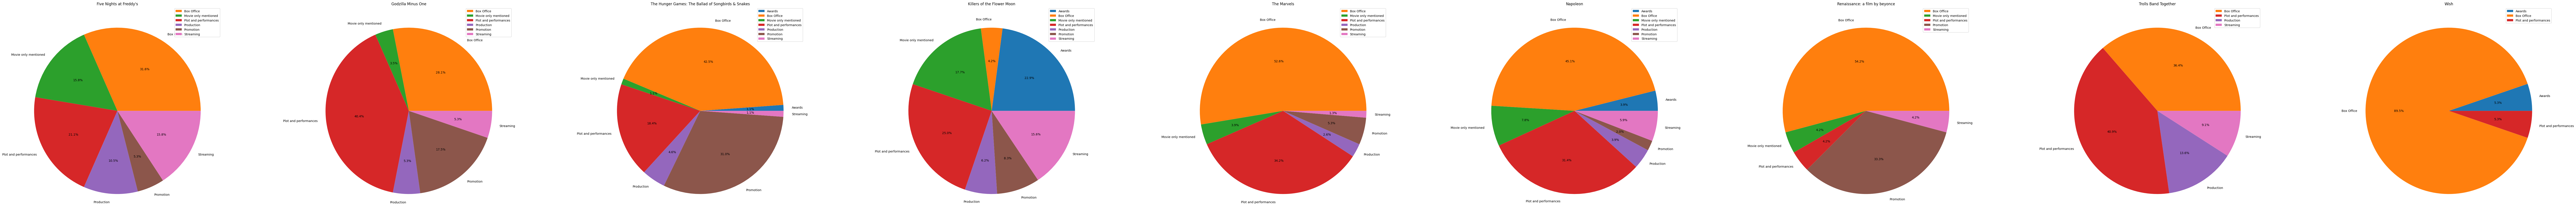

In [23]:
fig = unstacked.plot(kind='pie', subplots=True, figsize=(120, 10),
                     autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
axes = fig.flatten()
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_ylabel(None)

plt.tight_layout()
plt.savefig('./final_figs/Topics per movie.png')
plt.show()